<a href="https://colab.research.google.com/github/armand010/PCVK_Ganjil_2024/blob/main/PCVK_Week_6_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Library yang akan digunakan

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [3]:
imgLena = cv.imread('/content/gdrive/MyDrive/PCVK/lena.jpg')

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

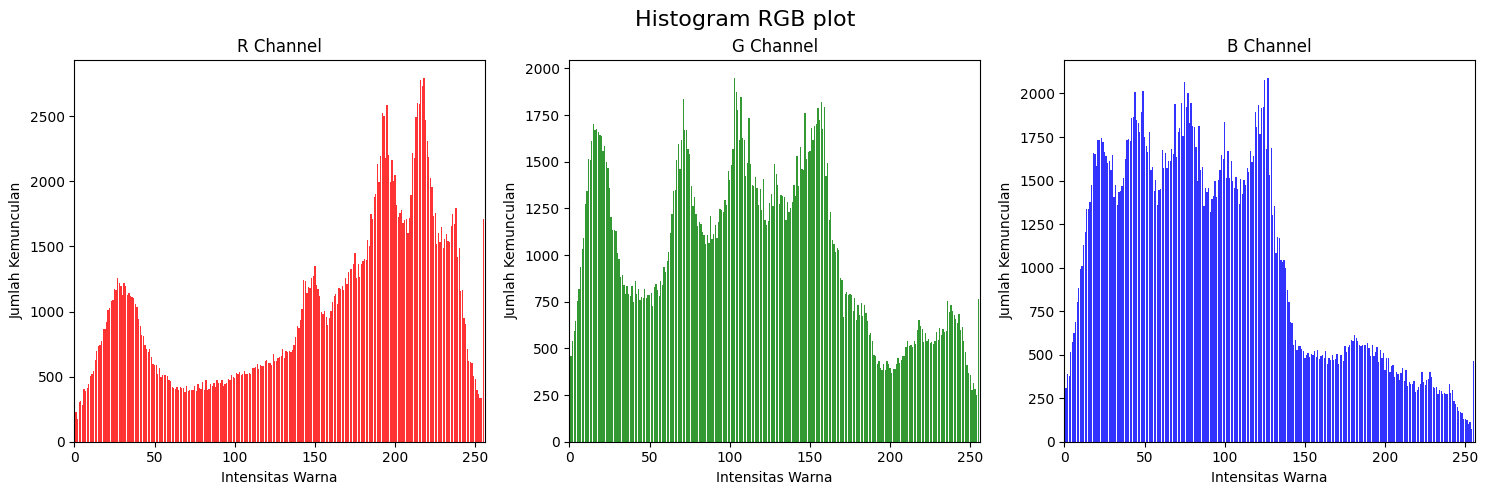

In [4]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB plot', fontsize=16)

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    histogram = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), histogram.ravel(), color=color, alpha=0.8)
    plt.title(f'{color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


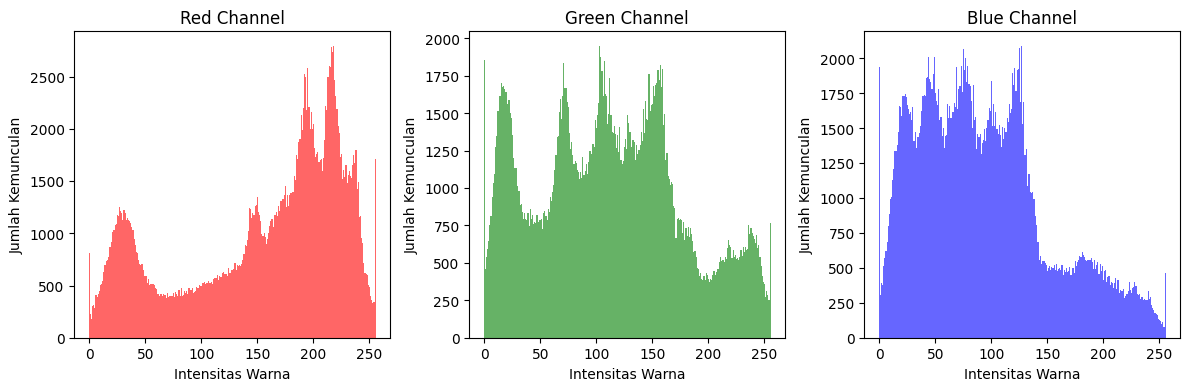

In [5]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# memisahkan kanal RGB
red_channel = img[:, :, 0].flatten()
green_channel = img[:, :, 1].flatten()
blue_channel = img[:, :, 2].flatten()

# menggunakan numpy.histogram untuk membuat histogram RGB
red_hist_np, red_bins_np = np.histogram(red_channel, bins=256, range=(0, 256))
green_hist_np, green_bins_np = np.histogram(green_channel, bins=256, range=(0, 256))
blue_hist_np, blue_bins_np = np.histogram(blue_channel, bins=256, range=(0, 256))

# membuat layout
plt.figure(figsize=(12, 8))

# membuat histogram untuk masing-masing kanal warna di baris kedua
plt.subplot(2, 3, 4)
plt.bar(red_bins_np[:-1], red_hist_np, color='red', alpha=0.6, width=1)
plt.title('Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 5)
plt.bar(green_bins_np[:-1], green_hist_np, color='green', alpha=0.6, width=1)
plt.title('Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(2, 3, 6)
plt.bar(blue_bins_np[:-1], blue_hist_np, color='blue', alpha=0.6, width=1)
plt.title('Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [6]:
imgLenalc = cv.imread('/content/gdrive/MyDrive/PCVK/lena_lc.jpg')

In [7]:
img = imgLenalc.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)